In [24]:
import numpy as np

attribute_names = ["Age", "Income", "Student", "Credit_Rating", "Buys_Computer"]

data = np.array([
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31-40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31-40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31-40", "medium", "no", "excellent", "yes"],
    ["31-40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
])

def entropy(data, column):
    unique_values, counts = np.unique(data[:, column], return_counts=True)
    probabilities = counts / len(data)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

entropies = {}
for column in range(data.shape[1] - 1):
    entropies[attribute_names[column]] = entropy(data, column)

first_feature = max(entropies.items(), key=lambda item: item[1])[0]

print("Entropy of each attribute / feature:")
for attribute, entropy_val in entropies.items():
    print(f"{attribute}: {entropy_val:.3f}")

print("First feature to be selected for constructing the decision tree:")
print(f"{first_feature}: {entropies[first_feature]:.3f}")

Entropy of each attribute / feature:
Age: 1.577
Income: 1.557
Student: 1.000
Credit_Rating: 0.985
First feature to be selected for constructing the decision tree:
Age: 1.577


In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

tree_depth = pipeline.named_steps["classifier"].get_depth()

print(f"Tree depth: {tree_depth}")

Tree depth: 4


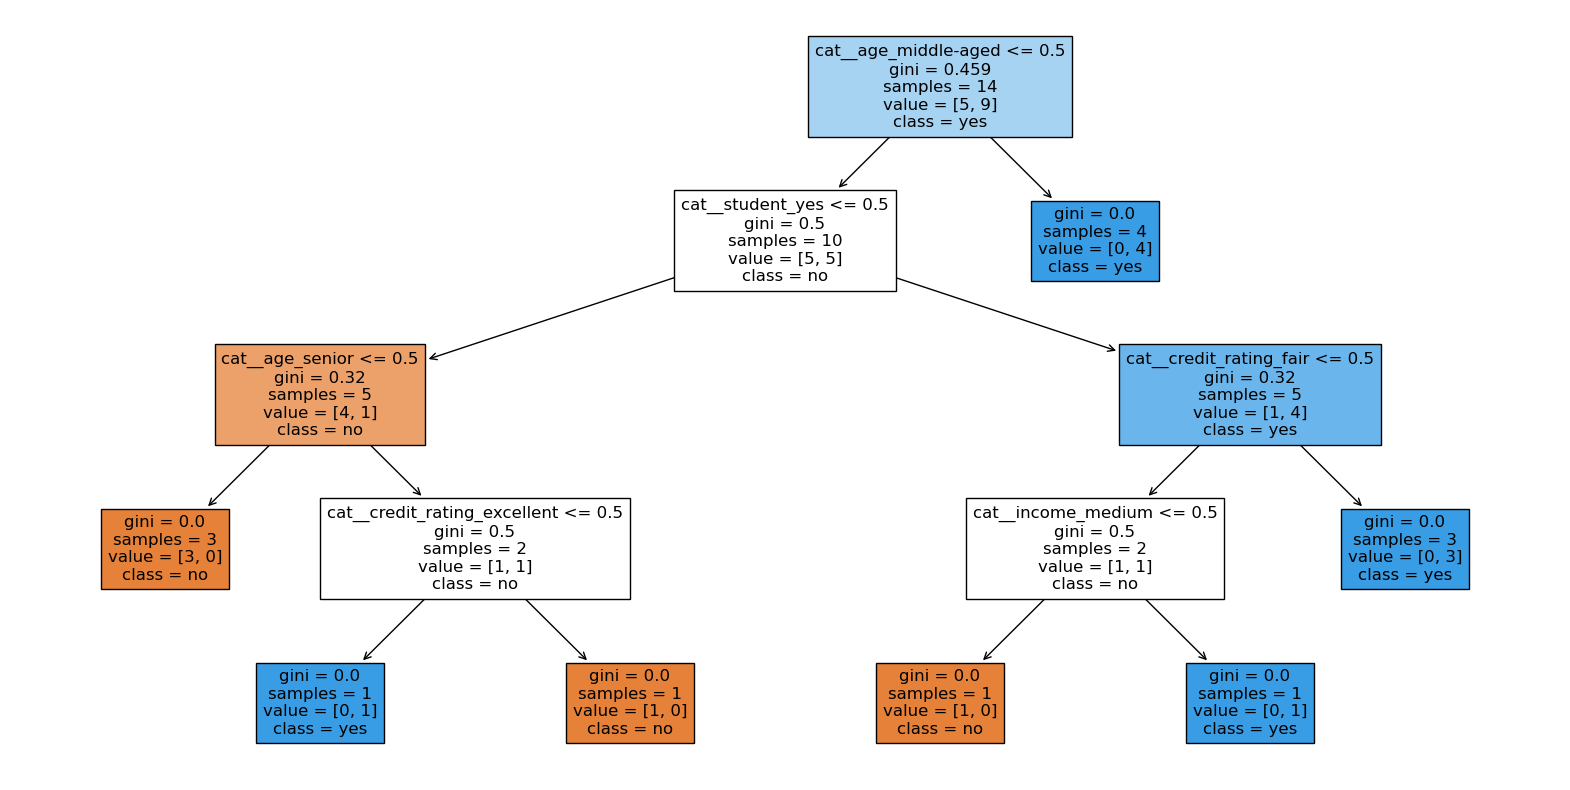

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

feature_names = list(pipeline.named_steps["preprocessor"].get_feature_names_out(input_features=categorical_features)) + list(X.columns.drop(categorical_features))

plt.figure(figsize=(20, 10))
plot_tree(pipeline.named_steps["classifier"], filled=True, feature_names=feature_names, class_names=['no', 'yes'])
plt.show()